# API Exercises

Here are two exercises that involve working with APIs and dictionaries.

One is using the Open Brewery API found at https://www.openbrewerydb.org/, and the other is using the API for UK Police Data, found at https://data.police.uk/docs/.

You can complete them in either order!

Remember that you can create new cells with esc + a or b

## Breweries

### Q1: Load the first page of results with 50 results per page

In [1]:
import requests
import json

In [4]:
url = 'https://api.openbrewerydb.org/breweries?page=1&per_page=50'
request = requests.get(url)

### Q2: This is only the first 50 results.  Get the next 50 and put them together.

In [5]:
url = 'https://api.openbrewerydb.org/breweries?page=2&per_page=50'
request2 = requests.get(url)

In [6]:
total_requests=request.json()
total_requests.extend(request2.json())

In [7]:
print(len(total_requests))

100


### Q3: How many of these 100 breweries in are in Alaska?

In [6]:
import json

In [7]:
count=0
for brewery in total_requests:
    if brewery['state']=='Alaska':
        count+=1
print(count)

3


### Q4: Of these 100 breweries, what are the different unique brewery types?

In [8]:
brewery_types=[]
for brewery in total_requests:
    brewery_types.append(brewery['brewery_type'])
unique_types=len(set(brewery_types))
print(unique_types)

6


### Q5: What is the cloest brewery to "Devil's Potion Brewing Company LLC" ?
* Hint 1: Use Euclidian distance w/ longitude and latitude (assume longitude and latitude are a Carteisan coordinate system)
* Hint 2: You'll have to ignore the entries with "none" for latitude or longitude

In [9]:
print(total_requests[0].keys())

dict_keys(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code', 'country', 'longitude', 'latitude', 'phone', 'website_url', 'updated_at', 'tag_list'])


In [10]:
for brewery in total_requests:
    if brewery['name']=="Devil's Potion Brewing Company LLC":
        location=[brewery['latitude'],brewery['longitude']]
print(location)

['33.1216751', '-117.0814849']


In [25]:
import math
minimum=10000
closest=''
for brewery in total_requests:
    if brewery['latitude'] != None and brewery['longitude'] !=None and brewery['name'] != "Devil's Potion Brewing Company LLC":
        distance = math.sqrt((float(brewery['latitude'])-float(location[0]))**2+(float((brewery['longitude']))-float(location[1]))**2)
        if distance<minimum:
            closest=brewery['name']
print(closest)

Dodgeton Creek Brewing Co.


### Q6: Write a function to find the closest brewery to any other given brewery

In [27]:
def find_nearest_brewery(brewery_list,brewery_name):
    for brewery in total_requests:
        if brewery['name']==brewer_name:
            location=[brewery['latitude'],brewery['longitude']]
    minimum=10000
    closest=''
    for brewery in brewery_list:
        if brewery['latitude'] != None and brewery['longitude'] !=None and brewery['name'] != brewery_name:
            distance = math.sqrt((float(brewery['latitude'])-float(location[0]))**2+(float((brewery['longitude']))-float(location[1]))**2)
            if distance<minimum:
                closest=brewery['name']
    return(closest)

### Q7: How would you get the first 10 pages from this API and put them all together using a for loop?

In [30]:
import requests
number_of_pages=10
all_requests=[]
for i in range(number_of_pages):
    url = f'https://api.openbrewerydb.org/breweries?page={i+1}&per_page=50'
    request = requests.get(url)
    all_requests.extend(request.json())
print(len(all_requests))


500


# Crime in the UK

### We will be analyzing different crimes reported in the UK as provided by https://data.police.uk/docs/

# Exploratory analysis
##### 1. How many total crimes were there at latitude : 52.63902 and -1.131321 on November of 2017.
Use the street level crimes data, the documentation for the API can be found at https://data.police.uk/docs/method/crime-street/

In [1]:
import requests
import json

In [11]:
request = requests.get('https://data.police.uk/api/crimes-street/all-crime?lat=52.63902&lng=-1.1313212&date=2017-11')

In [12]:
data=request.json()

In [20]:
data[0].keys()

dict_keys(['category', 'location_type', 'location', 'context', 'outcome_status', 'persistent_id', 'id', 'location_subtype', 'month'])

##### 2. We've queried the API once, but it could get annoying to retype the url over and over again, create a function `make_api_request` that enables you to query the API.


 The parameters for the function should be:
* lat (float) : latitude
* lng (float) : longitude
* date (string): Date in the format YYYY-MM
    * default value = `None`
    
And it should return a json object of 

for more information on default values check out http://blog.thedigitalcatonline.com/blog/2015/02/11/default-arguments-in-python/

In [2]:
def make_api_request(lat,lng,date):
    return requests.get(f'https://data.police.uk/api/crimes-street/all-crime?lat={lat}&lng={lng}&date={date}').json()


##### 3. Write a function `categories_of_crime` that will determine the count of each type of crime for a given latitude and longitude. This is labelled as 'category' in the records. Your function should call the `make_api_request` function you created.

The parameters for the function should be:

* lat (float) : latitude
* lng (float) : longitude
* date (str) default = None

The function should return:
* a dictionary with the count of each type of crime



Once you've created the function, try it with these locations
* lat, lng of 51.5017861,-0.1432319   (Buckingham Palace)
* lat, lng of 53.480161, -2.245163     (Manchester)

In [3]:
def categories_of_crime(lat,lng,date):
    data=make_api_request(lat,lng,date)
    category_count={}
    for crime in data:
        if crime['category'] not in category_count.keys():
            category_count[crime['category']]=1
        else:
            category_count[crime['category']]+=1
    return category_count


In [30]:
buckingham_data=categories_of_crime(51.5017861,-.1432319,'2017-11')

In [31]:
manchester_data=categories_of_crime(53.480161, -2.24516,'2018-01')

**Bonus**: 
* Write a function that determines the difference between Buckingham Palace and Manchester in terms of the number of crimes in each category.
    * In which category is there the largest absolute difference between the category of crime?
* Create a histogram depiction of the categories of crime

In [4]:
def difference_in_crime(lat1,lng1,lat2,lng2,date):
    first=categories_of_crime(lat1,lng1,date)
    second=categories_of_crime(lat2,lng2,date)
    
    diff={}
    for category in second:
        diff[category]=second[category]-first[category]
    return diff

In [5]:
hist_data=difference_in_crime(51.5017861,-0.1432319,53.480161, -2.245163,'2018-01')

In [16]:
hist_data

{'anti-social-behaviour': -147,
 'bicycle-theft': 30,
 'burglary': -37,
 'criminal-damage-arson': 55,
 'drugs': -59,
 'other-theft': -335,
 'possession-of-weapons': -11,
 'public-order': 159,
 'robbery': 10,
 'shoplifting': -190,
 'theft-from-the-person': -251,
 'vehicle-crime': 41,
 'violent-crime': 153,
 'other-crime': 14}

In [7]:
import matplotlib.pyplot as plt

In [11]:
len(categories)

14

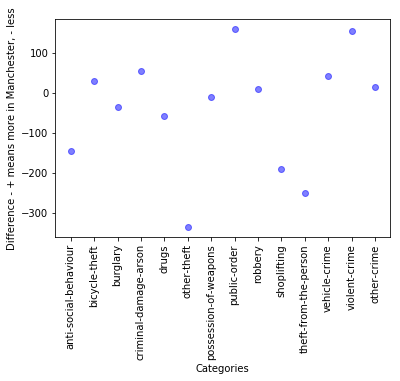

In [29]:
fig,ax=plt.subplots()
categories=[]
crime_diff=[]
for key,val in hist_data.items():
    categories.append(key)
    crime_diff.append(val)
plt.scatter((categories),crime_diff,facecolor='blue',alpha=.5)
plt.xlabel('Categories')
plt.xticks(range(len(categories)),categories,rotation='vertical')
plt.ylabel('Difference - + means more in Manchester, - less')
plt.show()

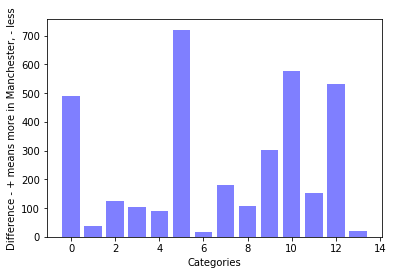

In [37]:
fig,ax=plt.subplots()
buckingham_crime=[]
for key,val in buckingham_data.items():
    buckingham_crime.append(val)
plt.bar(range(len(categories)),buckingham_crime,facecolor='blue',alpha=.5)
plt.xlabel('Categories')
#plt.xticks(range(len(categories)),categories,rotation='vertical')
plt.ylabel('Difference - + means more in Manchester, - less')
plt.show()

##### 4. Create a function `find_outcome_statuses` that will determine outcome statuses for a given latitude and longitude and date (optional)?
Investigate the data to determine where the outcome statuses are located.

**NOTE**: You'll notice that some of these crimes do not have crime outcomes. Make these into the category of "Not Resolved."

**NOTE 2**: These might take a long time to execute if you do not specify a month

**Bonus**: What is the ratio of crimes investigated to those not investigated? Is it higher near London or Manchester?

##### 5. Write a function `month_highest_crimes` that will return the month that had the highest number of crimes for a latitude, longitude and a year.

Inputs
* lat (float) : latitude
* lng (float) : longitude
* year (str) : in the format YYYY

Output
* month with highest crime (int)

**Bonus** Make a graph of how the number of crimes changed over time for a year. This will likely require a new function. Is seasonality a factor? Do the type of crimes change over time?

### Bonus Open Ended Questions

1. Take a look at the https://data.police.uk/docs/method/stops-street/ API. Is there a correlation between gender and being stopped and searched? How about race and being stopped and searched?